In [22]:
import pickle
import torch_geometric
import random
import yaml
from glob import glob
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import networkx as nx
import torch

In [4]:
params_path = '/xdisk/twheeler/jgaiser/deepvs3/params.yaml'
config_path = '/xdisk/twheeler/jgaiser/deepvs3/deepvs/config.yaml'
root_path = '/xdisk/twheeler/jgaiser/deepvs3/deepvs/'

with open(params_path, "r") as param_file:
    params = yaml.safe_load(param_file)
    
with open(config_path, "r") as config_file:
    config = yaml.safe_load(config_file)
    
mol_graph_ft = params['data_dir'] + config['mol_graph_file_template']

In [8]:
mol_graphs = glob(mol_graph_ft % '*')

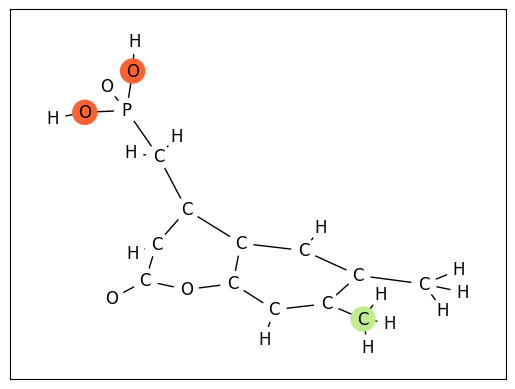

In [102]:
mol_g = pickle.load(open(random.choice(mol_graphs), 'rb'))
g = torch_geometric.utils.to_networkx(mol_g, to_undirected=True)

node_class = torch.argmax(mol_g.x[:,:-2],dim=1)
unique_identities = torch.unique(node_class)
labeldict = {}

for i in range(len(node_class)):
    labeldict[i] = config['MOL_ATOM_LABELS'][node_class[i].item()]

color_map = plt.get_cmap('rainbow_r', 9)
colors = [(1,1,1) for x in node_class]

interaction_nodes = torch.where(torch.sum(mol_g.y, dim=1)>0)[0]

for idx in interaction_nodes:
#     colors[idx] = torch.where(mol_g.y[idx]==1)
    colors[idx] = color_map(random.choice(torch.where(mol_g.y[idx]==1)[0]).item())


nx.draw_networkx(g, node_color=colors, labels=labeldict)